In [99]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [100]:
train_df = pd.read_csv(Path('Resources/Generator/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/Generator/2020Q1loans.csv'))

In [101]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [102]:
test_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N,low_risk
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N,low_risk
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N,low_risk


In [103]:
training_set_columns = train_df.columns
test_set_columns = test_df.columns

# Here I need to find columns that are not in both DataFrames
columns_not_in_train = test_set_columns.difference(training_set_columns)
columns_not_in_test = training_set_columns.difference(test_set_columns)

# I print the results to identify any differences
print("Columns in test set not in train set:", columns_not_in_train)
print("Columns in train set not in test set:", columns_not_in_test)

# Check if both DataFrames have exactly the same columns
same_columns = training_set_columns.equals(test_set_columns)
print("Do train and test DataFrames have the same columns?", same_columns)

Columns in test set not in train set: Index([], dtype='object')
Columns in train set not in test set: Index([], dtype='object')
Do train and test DataFrames have the same columns? True


In [104]:
training_set_columns

Index(['loan_amnt', 'int_rate', 'installment', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'm

In [105]:
# Convert categorical data to numeric and separate target feature for training data

# Set the target column, which contains the data our model will try to predict
target_column = 'target'

# Separate the target feature from the training data
y = train_df[target_column]

X = train_df.drop(target_column, axis=1)
X

# I realised here that the target column is dropped, as it contains the data we are going to try and predict.

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,100.0,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,85.7,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,94.3,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,92.9,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,84.1,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,0.0,0.0,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,4.0,0.0,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,0.0,1.0,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,0.0,0.0,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [106]:
# Convert categorical features to numeric using get_dummies()
X = pd.get_dummies(X)
print(X.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_in

In [107]:
# Saving list of columns after get_dummies() to ensure that testing set has the same columns
train_columns = X.columns
X

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,False,True,True,False,True,False,True,False,True,False
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,False,True,False,True,True,False,True,False,True,False
2,11000.0,0.2055,294.81,45000.0,37.25,1.0,3.0,23.0,0.0,8242.0,...,True,True,False,True,True,False,True,False,True,False
3,4000.0,0.1612,140.87,38000.0,42.89,1.0,0.0,7.0,0.0,12767.0,...,False,True,False,True,False,True,True,False,True,False
4,14000.0,0.1797,505.93,43000.0,22.16,1.0,0.0,22.0,0.0,11182.0,...,False,True,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,0.0,9679.0,...,False,True,False,True,True,False,True,False,True,False
12176,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,0.0,3193.0,...,True,True,False,True,True,False,True,False,True,False
12177,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,0.0,11804.0,...,False,True,False,True,True,False,True,False,True,False
12178,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,0.0,157.0,...,False,True,False,True,False,True,True,False,True,False


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [109]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = pd.get_dummies(test_df.drop(target_column, axis=1))

### Checking the Columns

In [110]:
train_not_test = set(train_columns) - set(X_test.columns)
print("Columns in train set not in test set:", train_not_test)
train_not_test

Columns in train set not in test set: {'debt_settlement_flag_Y'}


{'debt_settlement_flag_Y'}

In [111]:
# Here I add any missing dummy variables to the testing set that are in the training set
missing_cols = set(train_columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0

In [112]:
train_not_test = set(train_columns) - set(X_test.columns)
print("Columns in train set not in test set:", train_not_test)
train_not_test

Columns in train set not in test set: set()


set()

In [113]:
# I need to make sure that the order of columns in the test set is the same as in the training set
X_test = X_test[train_columns]
X_test

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,False,True,False,True,True,False,False,True,True,0
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,False,True,False,True,True,False,True,False,True,0
2,13500.0,0.1430,316.23,60000.0,28.72,0.0,0.0,8.0,0.0,13857.0,...,False,True,False,True,True,False,False,True,True,0
3,10625.0,0.1774,268.31,60000.0,15.70,0.0,4.0,17.0,0.0,6216.0,...,True,True,False,True,True,False,True,False,True,0
4,6375.0,0.1862,232.46,60000.0,35.50,0.0,0.0,13.0,0.0,12681.0,...,False,True,False,True,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,0.0,23215.0,...,False,True,True,False,True,False,True,False,True,0
4698,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,0.0,459.0,...,False,True,False,True,True,False,True,False,True,0
4699,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,0.0,6342.0,...,True,True,True,False,True,False,True,False,True,0
4700,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,1.0,11636.0,...,False,True,False,True,True,False,True,False,True,0


In [114]:
# I also need to separate the target feature from the testing data
y_test = test_df[target_column]
y_test

0        low_risk
1        low_risk
2        low_risk
3        low_risk
4        low_risk
          ...    
4697    high_risk
4698    high_risk
4699    high_risk
4700    high_risk
4701    high_risk
Name: target, Length: 4702, dtype: object

### Training a Logistic Regression Model

In [115]:
# Train the Logistic Regression model on the unscaled data and print the model score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/benjaminlucas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
# Predict the labels for both the training and test set
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
y_train_pred


array(['low_risk', 'low_risk', 'high_risk', ..., 'low_risk', 'low_risk',
       'low_risk'], dtype=object)

In [117]:
# Calculate the accuracy for both the training and test set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy of training set: {train_accuracy:.4f}")
print(f"Accuracy of test set: {test_accuracy:.4f}")

Accuracy of training set: 0.6522
Accuracy of test set: 0.5030


### Training a K-Nearest Neighbors Model

k: 1, Train/Test Score: 0.709/0.504
k: 3, Train/Test Score: 0.709/0.504
k: 5, Train/Test Score: 0.709/0.504
k: 7, Train/Test Score: 0.709/0.504
k: 9, Train/Test Score: 0.709/0.504
k: 11, Train/Test Score: 0.709/0.504
k: 13, Train/Test Score: 0.709/0.504
k: 15, Train/Test Score: 0.709/0.504
k: 17, Train/Test Score: 0.709/0.504
k: 19, Train/Test Score: 0.709/0.504
k: 21, Train/Test Score: 0.709/0.504
k: 23, Train/Test Score: 0.709/0.504
k: 25, Train/Test Score: 0.709/0.504
k: 27, Train/Test Score: 0.709/0.504
k: 29, Train/Test Score: 0.709/0.504
k: 31, Train/Test Score: 0.709/0.504
k: 33, Train/Test Score: 0.709/0.504
k: 35, Train/Test Score: 0.709/0.504
k: 37, Train/Test Score: 0.709/0.504
k: 39, Train/Test Score: 0.709/0.504
k: 41, Train/Test Score: 0.709/0.504
k: 43, Train/Test Score: 0.709/0.504
k: 45, Train/Test Score: 0.709/0.504
k: 47, Train/Test Score: 0.709/0.504
k: 49, Train/Test Score: 0.709/0.504


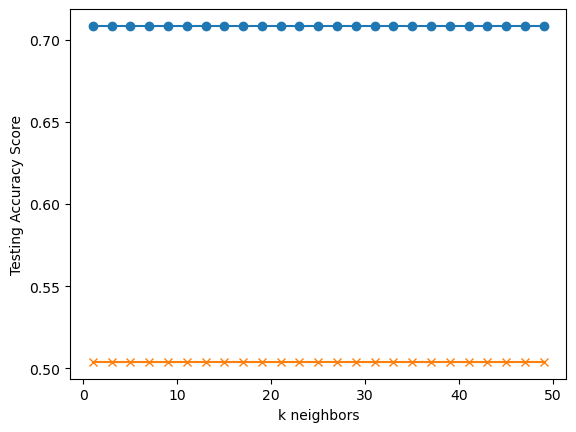

In [124]:
# Train a K-Nearest Neighbors model and print the model score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for k in range (1, 20, 2):
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)  
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

### Scaling the Data

In [119]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 2.21889154, -1.11788731,  1.04579153, ..., -0.16911648,
         0.02340182, -0.02340182],
       [-1.24986925, -1.4448305 , -1.24929264, ..., -0.16911648,
         0.02340182, -0.02340182],
       [ 1.77918947, -0.58306116,  0.90175114, ..., -0.16911648,
         0.02340182, -0.02340182],
       ...,
       [-1.4452924 ,  0.68691471, -1.41130416, ..., -0.16911648,
         0.02340182, -0.02340182],
       [-0.12618618, -0.71346047,  0.04232374, ..., -0.16911648,
         0.02340182, -0.02340182],
       [ 1.73033368, -1.4448305 ,  1.91851079, ..., -0.16911648,
         0.02340182, -0.02340182]])

In [125]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[1.        , 0.18867102, 0.50305608, ..., 1.        , 1.        ,
        0.        ],
       [0.60128205, 0.36165577, 0.33018483, ..., 0.        , 1.        ,
        0.        ],
       [0.32051282, 0.36165577, 0.17388284, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.23076923, 0.74291939, 0.21722862, ..., 0.        , 1.        ,
        0.        ],
       [0.17948718, 0.54989107, 0.10662466, ..., 0.        , 1.        ,
        0.        ],
       [0.74358974, 0.63398693, 0.66572618, ..., 0.        , 1.        ,
        0.        ]])

In [126]:
scaler = MinMaxScaler().fit(X_train)
X_train_minmax = scaler.transform(X_train)
X_train_minmax

array([[1.        , 0.09542484, 0.47764459, ..., 0.        , 1.        ,
        0.        ],
       [0.08974359, 0.02004357, 0.06517407, ..., 0.        , 1.        ,
        0.        ],
       [0.88461538, 0.21873638, 0.45175778, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03846154, 0.51154684, 0.0360575 , ..., 0.        , 1.        ,
        0.        ],
       [0.38461538, 0.18867102, 0.29730224, ..., 0.        , 1.        ,
        0.        ],
       [0.87179487, 0.02004357, 0.63448894, ..., 0.        , 1.        ,
        0.        ]])

In [129]:
X_test_minmax = scaler.transform(X_test)
X_test_minmax

array([[1.        , 0.18867102, 0.50305608, ..., 1.        , 1.        ,
        0.        ],
       [0.60128205, 0.36165577, 0.33018483, ..., 0.        , 1.        ,
        0.        ],
       [0.32051282, 0.36165577, 0.17388284, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.23076923, 0.74291939, 0.21722862, ..., 0.        , 1.        ,
        0.        ],
       [0.17948718, 0.54989107, 0.10662466, ..., 0.        , 1.        ,
        0.        ],
       [0.74358974, 0.63398693, 0.66572618, ..., 0.        , 1.        ,
        0.        ]])

### Logistic Regression on Scaled Data

In [127]:
# Train the Logistic Regression model on the scaled data and print the model score

scaled_model = LogisticRegression(max_iter=1000)
scaled_model.fit(X_train_scaled, y_train)

y_scaled_train_pred = scaled_model.predict(X_train_scaled)
y_scaled_test_pred = scaled_model.predict(X_test_scaled)
y_scaled_train_pred

scaled_train_accuracy = accuracy_score(y_train, y_scaled_train_pred)
scaled_test_accuracy = accuracy_score(y_test, y_scaled_test_pred)
print(f"Accuracy of training set: {scaled_train_accuracy:.4f}")
print(f"Accuracy of test set: {scaled_test_accuracy:.4f}")

Accuracy of training set: 0.7057
Accuracy of test set: 0.6997


### KNN Model on Scaled Data

k: 1, Train/Test Score: 0.737/0.532
k: 3, Train/Test Score: 0.737/0.532
k: 5, Train/Test Score: 0.737/0.532
k: 7, Train/Test Score: 0.737/0.532
k: 9, Train/Test Score: 0.737/0.532
k: 11, Train/Test Score: 0.737/0.532
k: 13, Train/Test Score: 0.737/0.532
k: 15, Train/Test Score: 0.737/0.532
k: 17, Train/Test Score: 0.737/0.532
k: 19, Train/Test Score: 0.737/0.532


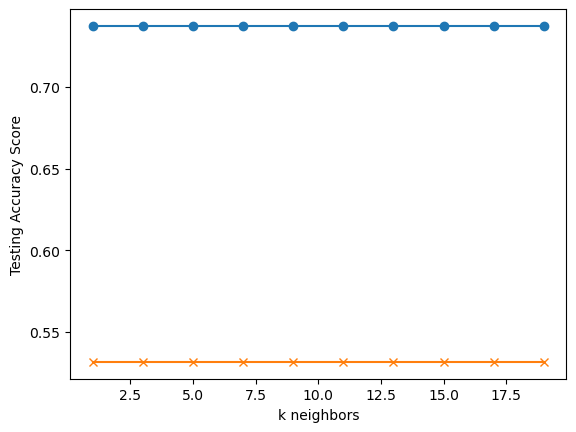

In [128]:
# Train a K-Nearest Neighbors model on the scaled data and print the model score

scaled_train_scores = []
scaled_test_scores = []

for k in range (1, 20, 2):
    knn = KNeighborsClassifier()
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    scaled_train_scores.append(train_score)
    scaled_test_scores.append(test_score)  
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), scaled_train_scores, marker='o')
plt.plot(range(1, 20, 2), scaled_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

### Measuring with MinMax Scaler

In [131]:
scaled_model = LogisticRegression(max_iter=1000)
scaled_model.fit(X_train_minmax, y_train)

y_scaled_train_pred = scaled_model.predict(X_train_minmax)
y_scaled_test_pred = scaled_model.predict(X_test_minmax)
y_scaled_train_pred

minmax_train_accuracy = accuracy_score(y_train, y_scaled_train_pred)
minmax_test_accuracy = accuracy_score(y_test, y_scaled_test_pred)
print(f"Accuracy of training set: {minmax_train_accuracy:.4f}")
print(f"Accuracy of test set: {minmax_test_accuracy:.4f}")

Accuracy of training set: 0.6739
Accuracy of test set: 0.6259


k: 1, Train/Test Score: 0.736/0.549
k: 3, Train/Test Score: 0.736/0.549
k: 5, Train/Test Score: 0.736/0.549
k: 7, Train/Test Score: 0.736/0.549
k: 9, Train/Test Score: 0.736/0.549
k: 11, Train/Test Score: 0.736/0.549
k: 13, Train/Test Score: 0.736/0.549
k: 15, Train/Test Score: 0.736/0.549
k: 17, Train/Test Score: 0.736/0.549
k: 19, Train/Test Score: 0.736/0.549


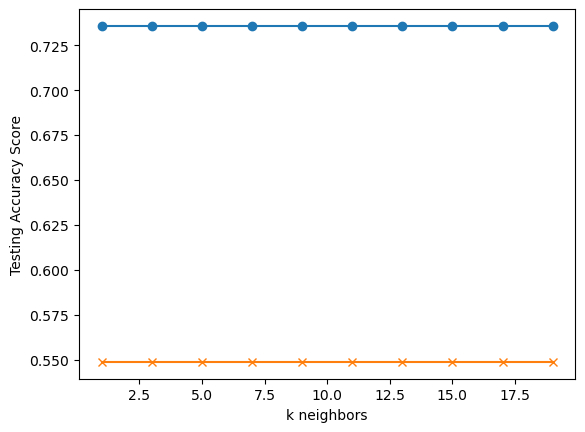

In [132]:
minmax_train_scores = []
minmax_test_scores = []

for k in range (1, 20, 2):
    knn = KNeighborsClassifier()
    knn.fit(X_train_minmax, y_train)
    train_score = knn.score(X_train_minmax, y_train)
    test_score = knn.score(X_test_minmax, y_test)
    minmax_train_scores.append(train_score)
    minmax_test_scores.append(test_score)  
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), minmax_train_scores, marker='o')
plt.plot(range(1, 20, 2), minmax_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()